In [1]:
##this is derived from Signal_Model_Usage_Example_20191127.ipynb

In [2]:
import numpy as np
import pickle as pkl
import scipy.interpolate as interp
import scipy, sys, time
from bisect import bisect_left
import matplotlib.pyplot as plt
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile
from discharge_tools import load_dir
sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [6]:
#for z force, 3/20 data: 6 um height, 9.05 um offset
for i in range(0,70):
    L=pow(10,i/30.0-0.3)*1e-6
    D=15.8e-6
    H=10e-6
    Fshake=3
    test = force_vs_time(D,H,200e-6,Fshake,"z",L,yuk_or_grav="yuk",alpha=1e10,offset_y=6.5e-6,bead_size=3.8e-6)
    ofname = "/data/new_trap/Results/AkioK/2020_03_06_Bead1/SignalZD%dumH%dumL%.02f.txt" % (D*1e6,H*1e6,L*1e6)
    
    
    fsamp=5000
    res=50000

    norm = np.sqrt(2 / (res* fsamp))

    s = np.arange(0, 5, 0.0001)
    for i in range(0,10):
        for j in range(0,5000):
            s[j+i*5000]=test[1][j]
    
    sFFT=np.fft.rfft(s)
    spsd = (sFFT * sFFT.conj()).real
    spsd = norm**2 * (sFFT * sFFT.conj()).real
    snsd=np.sqrt(spsd)
    
    f1 = open(ofname,"a")
    
    for i in range(1,int(fsamp/2/Fshake)+1):
        Ints=sFFT[Fshake*10*i]
        IntNSDs=snsd[Fshake*10*i]
     
        SigAmpX=IntNSDs
        SigPhaX=np.angle(Ints)         
        f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, 0,0, SigPhaX, 0,0))
    f1.close()

Your choice of lambda is not existing
Taking 5.01e-07 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.55e-05 is selected
A height of 1.00e-05 is selected
Your choice of lambda is not existing
Taking 5.41e-07 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.55e-05 is selected
A height of 1.00e-05 is selected
Your choice of lambda is not existing
Taking 5.84e-07 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.55e-05 is selected
A height of 1.00e-05 is selected
Your choice of lambda is not existing
Taking 6.31e-07 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size o

Your choice of lambda is not existing
Taking 6.81e-06 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.55e-05 is selected
A height of 1.00e-05 is selected
Your choice of lambda is not existing
Taking 7.36e-06 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.55e-05 is selected
A height of 1.00e-05 is selected
Your choice of lambda is not existing
Taking 7.94e-06 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.55e-05 is selected
A height of 1.00e-05 is selected
Your choice of lambda is not existing
Taking 8.58e-06 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size o

Your choice of lambda is not existing
Taking 9.26e-05 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.55e-05 is selected
A height of 1.00e-05 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.55e-05 is selected
A height of 1.00e-05 is selected


In [52]:
#for z force, 3/20 data: 378-3
D=21.4e-6
H=-15.3e-6
Fshake=3
Stroke=200e-6
Yorigin=((437.3-237.7)-200)*1e-6

for i in range(0,70):
    L=pow(10,i/30.0-0.3)*1e-6
    test = force_vs_time(D,H,-Stroke,Fshake,"z",L,yuk_or_grav="yuk",alpha=1e10,offset_y=Yorigin)
    ofname = "/data/new_trap/Results/AkioK/2020_03_20_SignalAnalysis/SignalZD%dumH%dumL%.02f.txt" % (D*1e6,H*1e6,L*1e6)
    
    
    fsamp=5000
    res=50000

    norm = np.sqrt(2 / (res* fsamp))

    s = np.arange(0, 5, 0.0001)
    for i in range(0,10):
        for j in range(0,5000):
            s[j+i*5000]=test[1][j]
    
    sFFT=np.fft.rfft(s)
    spsd = (sFFT * sFFT.conj()).real
    spsd = norm**2 * (sFFT * sFFT.conj()).real
    snsd=np.sqrt(spsd)
    
    f1 = open(ofname,"a")
    
    for i in range(1,int(fsamp/2/Fshake)+1):
        Ints=sFFT[Fshake*10*i]
        IntNSDs=snsd[Fshake*10*i]
     
        SigAmpX=IntNSDs
        SigPhaX=np.angle(Ints)         
        f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, 0,0, SigPhaX, 0,0))
    f1.close()

Your choice of lambda is not existing
Taking 5.01e-07 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 2.05e-05 is selected
A height of -1.50e-05 is selected
Your choice of lambda is not existing
Taking 5.41e-07 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 2.05e-05 is selected
A height of -1.50e-05 is selected
Your choice of lambda is not existing
Taking 5.84e-07 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 2.05e-05 is selected
A height of -1.50e-05 is selected
Your choice of lambda is not existing
Taking 6.31e-07 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead siz

Your choice of lambda is not existing
Taking 5.01e-06 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 2.05e-05 is selected
A height of -1.50e-05 is selected
Your choice of lambda is not existing
Taking 5.41e-06 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 2.05e-05 is selected
A height of -1.50e-05 is selected
Your choice of lambda is not existing
Taking 5.84e-06 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 2.05e-05 is selected
A height of -1.50e-05 is selected
Your choice of lambda is not existing
Taking 6.31e-06 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead siz

Your choice of lambda is not existing
Taking 5.41e-05 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 2.05e-05 is selected
A height of -1.50e-05 is selected
Your choice of lambda is not existing
Taking 5.84e-05 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 2.05e-05 is selected
A height of -1.50e-05 is selected
Your choice of lambda is not existing
Taking 6.31e-05 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 2.05e-05 is selected
A height of -1.50e-05 is selected
Your choice of lambda is not existing
Taking 6.81e-05 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead siz

In [5]:
#for z force, 2/26 data: 6 um height, 7.17 um distance, 9.03 um offset
for i in range(0,70):
    L=pow(10,i/30.0-0.3)*1e-6
    D=8.0e-6
    H=6e-6
    Fshake=3
    test = force_vs_time(D,H,100e-6,Fshake,"z",L,yuk_or_grav="yuk",alpha=1e10,offset_y=9.03e-6)
    ofname = "/data/new_trap/Results/AkioK/2020_03_02_SignalAnalysis/SignalZD%.01fumH%dumL%.02f.txt" % (D*1e6,H*1e6,L*1e6)
    
    
    fsamp=5000
    res=50000

    norm = np.sqrt(2 / (res* fsamp))

    s = np.arange(0, 5, 0.0001)
    for i in range(0,10):
        for j in range(0,5000):
            s[j+i*5000]=test[1][j]
    
    sFFT=np.fft.rfft(s)
    spsd = (sFFT * sFFT.conj()).real
    spsd = norm**2 * (sFFT * sFFT.conj()).real
    snsd=np.sqrt(spsd)
    
    f1 = open(ofname,"a")
    
    for i in range(1,int(fsamp/2/Fshake)+1):
        Ints=sFFT[Fshake*10*i]
        IntNSDs=snsd[Fshake*10*i]
     
        SigAmpX=IntNSDs
        SigPhaX=np.angle(Ints)         
        f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, 0,0, SigPhaX, 0,0))
    f1.close()

Your choice of lambda is not existing
Taking 5.01e-07 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 8.00e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 5.41e-07 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 8.00e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 5.84e-07 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 8.00e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 6.31e-07 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size o

Your choice of lambda is not existing
Taking 5.84e-06 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 8.00e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 6.31e-06 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 8.00e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 6.81e-06 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 8.00e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 7.36e-06 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size o

Your choice of lambda is not existing
Taking 8.58e-05 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 8.00e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 9.26e-05 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 8.00e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 8.00e-06 is selected
A height of 6.00e-06 is selected


In [22]:
#For 3Hz data, x
for i in range(0,70):
    L=pow(10,i/30.0-0.3)*1e-6
    D=11e-6
    test = force_vs_time(D,0e-6,100e-6,3,"x",L,yuk_or_grav="yuk",alpha=1e10)
    ofname = "/home/analysis_user/Results/AkioK/2019_12_30_SignalAnalysis/Signal2D%dum3HzL%.02f.txt" % (D*1e6,L*1e6)
    
    fsamp=5000
    res=50000
    Nint=2
    Nave=3
    norm = np.sqrt(2 / (res* fsamp))

    s = np.arange(0, 5, 0.0001)
    for i in range(0,10):
        for j in range(0,5000):
            s[j+i*5000]=test[1][j]
    
    sFFT=np.fft.rfft(s)
    spsd = (sFFT * sFFT.conj()).real
    spsd = norm**2 * (sFFT * sFFT.conj()).real
    snsd=np.sqrt(spsd)
    sphase=np.arctan(sFFT.imag/sFFT.real)
    Fshake=3
    f1 = open(ofname,"a")
    
    for i in range(1,int(fsamp/2/Fshake)+1):
        Ints=sFFT[Fshake*10*i]
        IntNSDs=snsd[Fshake*10*i]
    
        for j in range(1,(Nint)):
            Ints+=sFFT[Fshake*10*i+j]+sFFT[Fshake*10*i-j]
            IntNSDs+=snsd[Fshake*10*i+j]+snsd[Fshake*10*i-j]
 
        AveNoiseX=0
        SigAmpX=IntNSDs-AveNoiseX*(Nint*2+1)
        SigPhaX=np.angle(Ints)         
        f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, 0,0, SigPhaX, 0,0))
    f1.close()

Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 5.01e-07 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 5.41e-07 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 5.84e-07 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 6.31e-07 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide


Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 7.36e-07 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 7.94e-07 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 8.58e-07 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 9.26e-07 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or

/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide


Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 1.58e-06 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 1.71e-06 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 1.85e-06 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 2.00e-06 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or

Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 3.16e-05 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 3.41e-05 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 3.69e-05 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or height is not existing
Taking 1.1e-05 for separation
Taking 8.5e-21 for height
Your choice of lambda is not existing
Taking 3.98e-05 for lambda
A separation of 1.10e-05 is selected
A height of 8.47e-21 is selected
Your choice of separation or

In [16]:
##this is a way to get force vs position
for i in range(0,70):
    L=pow(10,i/30.0-0.3)*1e-6
    D=8e-6
    H=6e-6
    result=force_vs_position(8.4e-6,-6e-6,"x",5e-6,yuk_or_grav="yuk",alpha=1e10)
    ofname = "/home/analysis_user/Results/AkioK/2020_02_03_SpaceDomainAnalysis/SignalVSPositionZD%dumH%dumL%.02f.txt" % (D*1e6,H*1e6,L*1e6)
    f1 = open(ofname,"a")
    for i in range(1,1000):
        f1.write('%e %e\n' % (result[0][i],result[1][i]))
    f1.close()

Your choice of separation or height is not existing
Taking 8.5e-06 for separation
Taking -6.0e-06 for height
Your choice of lambda is not existing
Taking 5.01e-06 for lambda
A separation of 8.50e-06 is selected
A height of -6.00e-06 is selected
Your choice of separation or height is not existing
Taking 8.5e-06 for separation
Taking -6.0e-06 for height
Your choice of lambda is not existing
Taking 5.01e-06 for lambda
A separation of 8.50e-06 is selected
A height of -6.00e-06 is selected
Your choice of separation or height is not existing
Taking 8.5e-06 for separation
Taking -6.0e-06 for height
Your choice of lambda is not existing
Taking 5.01e-06 for lambda
A separation of 8.50e-06 is selected
A height of -6.00e-06 is selected
Your choice of separation or height is not existing
Taking 8.5e-06 for separation
Taking -6.0e-06 for height
Your choice of lambda is not existing
Taking 5.01e-06 for lambda
A separation of 8.50e-06 is selected
A height of -6.00e-06 is selected
Your choice of separ

Your choice of separation or height is not existing
Taking 8.5e-06 for separation
Taking -6.0e-06 for height
Your choice of lambda is not existing
Taking 5.01e-06 for lambda
A separation of 8.50e-06 is selected
A height of -6.00e-06 is selected
Your choice of separation or height is not existing
Taking 8.5e-06 for separation
Taking -6.0e-06 for height
Your choice of lambda is not existing
Taking 5.01e-06 for lambda
A separation of 8.50e-06 is selected
A height of -6.00e-06 is selected
Your choice of separation or height is not existing
Taking 8.5e-06 for separation
Taking -6.0e-06 for height
Your choice of lambda is not existing
Taking 5.01e-06 for lambda
A separation of 8.50e-06 is selected
A height of -6.00e-06 is selected
Your choice of separation or height is not existing
Taking 8.5e-06 for separation
Taking -6.0e-06 for height
Your choice of lambda is not existing
Taking 5.01e-06 for lambda
A separation of 8.50e-06 is selected
A height of -6.00e-06 is selected
Your choice of separ

In [35]:
L=10*1e-6
D=8.5e-6
H=6e-6
Fshake=3
test = force_vs_time(D,H,100e-6,Fshake,"z",L,yuk_or_grav="yuk",alpha=1e10,offset_y=45e-6)
ofname = "/data/new_trap/Results/AkioK/2020_02_24_SignalAnalysis/SignalZD%dumH%dumL%.02fY45.txt" % (D*1e6,H*1e6,L*1e6)
    
    
fsamp=5000
res=50000

norm = np.sqrt(2 / (res* fsamp))

s = np.arange(0, 5, 0.0001)
for i in range(0,10):
    for j in range(0,5000):
        s[j+i*5000]=test[1][j]
    
sFFT=np.fft.rfft(s)
spsd = (sFFT * sFFT.conj()).real
spsd = norm**2 * (sFFT * sFFT.conj()).real
snsd=np.sqrt(spsd)
    
f1 = open(ofname,"a")
    
for i in range(1,int(fsamp/2/Fshake)+1):
    Ints=sFFT[Fshake*10*i]
    IntNSDs=snsd[Fshake*10*i]
     
    SigAmpX=IntNSDs
    SigPhaX=np.angle(Ints)         
    f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, 0,0, SigPhaX, 0,0))
f1.close()

Your choice of lambda is not existing
Taking 1.00e-05 for lambda
order
A bead size of 2.40e-06 is selected
2.4e-06
2.4e-06
A bead size of 2.40e-06 is selected
2.4e-06
posvec
A bead size of 2.40e-06 is selected
2.4e-06
A separation of 8.50e-06 is selected
A height of 6.00e-06 is selected


In [44]:
#for z force, 3/20 data: 6 um height, 9.05 um offset
for i in range(30,31):
    L=pow(10,i/30.0-0.3)*1e-6
    D=15.8e-6
    H=-10e-6
    Fshake=2
    test = force_vs_time(D,H,-50e-6,Fshake,"z",L,yuk_or_grav="yuk",alpha=1e10,offset_y=3e-6,bead_size=3.8e-6)

Your choice of lambda is not existing
Taking 5.01e-06 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.55e-05 is selected
A height of -1.05e-05 is selected


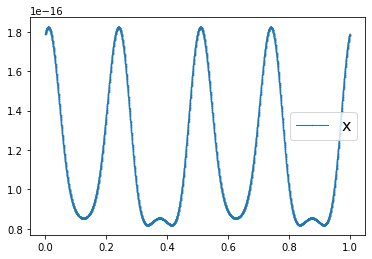

In [45]:
_,ax = plt.subplots()

ax.plot(test[0],test[1], '.-', label="x",markersize=1,linewidth=1)

ax.legend(fontsize=16)
#ax.set_xlabel('Frequency [Hz]', fontsize=18)
#ax.set_ylabel('Force NSD [N/√Hz]',fontsize=18)

#ax.tick_params(axis='x', labelsize=18)
#ax.tick_params(axis='y', labelsize=18)
#plt.xlim(0.1,500)
#plt.ylim(1e-18,1e-14)
#plt.grid(True)

In [25]:
print(test[1])

[-1.41564684e-16 -1.40061701e-16 -1.38502271e-16 ... -1.45612503e-16
 -1.44328073e-16 -1.42978248e-16]


In [ ]:
#3/20 Bead1, 378_3 data, With xyz offset provided Nadav

In [4]:
for i in range(0,70):
    L=pow(10,i/30.0-0.3)*1e-6
    D=13.6e-6
    H=-15.7e-6
    Fshake=3
    test = force_vs_time(D,H,200e-6,Fshake,"z",L,yuk_or_grav="yuk",alpha=1e10,offset_y=4.9e-6,bead_size=3.8e-6)
    ofname = "/data/new_trap/Results/AkioK/2020_03_20_SignalAnalysis/SignalZReanD%dumH%dumL%.02f.txt" % (D*1e6,H*1e6,L*1e6)
    
    
    fsamp=5000
    res=50000

    norm = np.sqrt(2 / (res* fsamp))

    s = np.arange(0, 5, 0.0001)
    for i in range(0,10):
        for j in range(0,5000):
            s[j+i*5000]=test[1][j]
    
    sFFT=np.fft.rfft(s)
    spsd = (sFFT * sFFT.conj()).real
    spsd = norm**2 * (sFFT * sFFT.conj()).real
    snsd=np.sqrt(spsd)
    
    f1 = open(ofname,"a")
    
    for i in range(1,int(fsamp/2/Fshake)+1):
        Ints=sFFT[Fshake*10*i]
        IntNSDs=snsd[Fshake*10*i]
     
        SigAmpX=IntNSDs
        SigPhaX=np.angle(Ints)         
        f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, 0,0, SigPhaX, 0,0))
    f1.close()

Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.3e-05 for separation
Taking -1.5e-05 for height
Your choice of lambda is not existing
Taking 5.01e-07 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.30e-05 is selected
A height of -1.50e-05 is selected
Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.3e-05 for separation
Taking -1.5e-05 for height
Your choice of lambda is not existing
Taking 5.41e-07 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.30e-05 is selected
A height of -1.50e-05 is selected
Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.3e-05 for separation
Taking -1.5e-05 for height
Your cho

Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.3e-05 for separation
Taking -1.5e-05 for height
Your choice of lambda is not existing
Taking 2.33e-06 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.30e-05 is selected
A height of -1.50e-05 is selected
Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.3e-05 for separation
Taking -1.5e-05 for height
Your choice of lambda is not existing
Taking 2.51e-06 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.30e-05 is selected
A height of -1.50e-05 is selected
Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.3e-05 for separation
Taking -1.5e-05 for height
Your cho

3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.30e-05 is selected
A height of -1.50e-05 is selected
Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.3e-05 for separation
Taking -1.5e-05 for height
Your choice of lambda is not existing
Taking 1.36e-05 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.30e-05 is selected
A height of -1.50e-05 is selected
Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.3e-05 for separation
Taking -1.5e-05 for height
Your choice of lambda is not existing
Taking 1.47e-05 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.30e-05 is selecte

Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.3e-05 for separation
Taking -1.5e-05 for height
Your choice of lambda is not existing
Taking 7.36e-05 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.30e-05 is selected
A height of -1.50e-05 is selected
Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.3e-05 for separation
Taking -1.5e-05 for height
Your choice of lambda is not existing
Taking 7.94e-05 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.30e-05 is selected
A height of -1.50e-05 is selected
Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.3e-05 for separation
Taking -1.5e-05 for height
Your cho

In [7]:
    L=pow(10,i/30.0-0.3)*1e-6
    D=13.6e-6
    H=-15.7e-6
    Fshake=3
    test = force_vs_time(D,H,200e-6,Fshake,"z",L,yuk_or_grav="yuk",alpha=1e10,offset_y=4.9e-6,bead_size=3.8e-6)

    fsamp=5000
    res=50000

    norm = np.sqrt(2 / (res* fsamp))

    s = np.arange(0, 5, 0.0001)
    for i in range(0,10):
        for j in range(0,5000):
            s[j+i*5000]=test[1][j]
    
    sFFT=np.fft.rfft(s)
    spsd = (sFFT * sFFT.conj()).real
    spsd = norm**2 * (sFFT * sFFT.conj()).real
    snsd=np.sqrt(spsd)

Your choice of separation or height is not existing
Taking 3.8e-06 for bead_size
Taking 1.3e-05 for separation
Taking -1.5e-05 for height
Your choice of lambda is not existing
Taking 1.00e-03 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.30e-05 is selected
A height of -1.50e-05 is selected


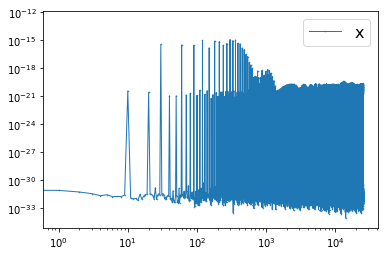

In [10]:
_,ax = plt.subplots()

ax.loglog(snsd, '.-', label="x",markersize=1,linewidth=1)

ax.legend(fontsize=16)
#ax.set_xlabel('Frequency [Hz]', fontsize=18)
#ax.set_ylabel('Force NSD [N/√Hz]',fontsize=18)

#ax.tick_params(axis='x', labelsize=18)
#ax.tick_params(axis='y', labelsize=18)
#plt.xlim(0.1,500)
#plt.ylim(1e-18,1e-14)
#plt.grid(True)